In [84]:
from sklearn.cluster import AgglomerativeClustering
from sentence_transformers import SentenceTransformer

In [85]:
import pandas as pd

In [86]:
model=SentenceTransformer('all-MiniLM-l6-v2')

In [87]:
data=pd.read_csv('/content/drive/MyDrive/Nlp Dev/train_sent_emo (1).csv')

In [88]:
data.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [89]:
data.shape

(9989, 11)

In [90]:
data.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

In [91]:
sentence=data['Utterance'].astype(str).tolist()
embeddings=model.encode(sentence,show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

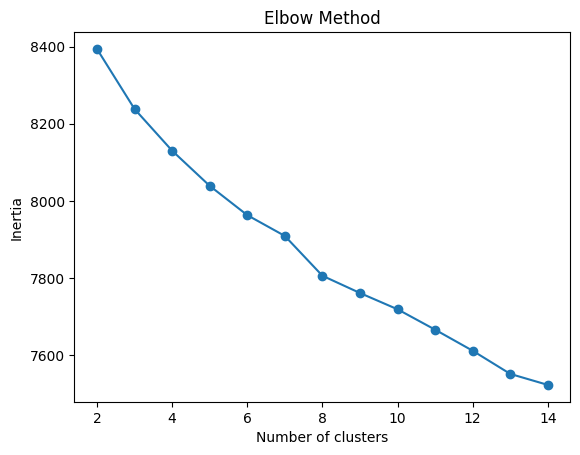

In [92]:
inertias = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 15), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(embeddings)
data['Cluster'] = labels


In [94]:
for c in sorted(data['Cluster'].unique()):
  print(f"cluster{c}:")
  print(data[data['Cluster']==c]['Utterance'].sample(3).tolist())

cluster0:
["Stop with the broom, we're not making noise.", "Oh he's like a...", 'Yeah, it\x92s a very large plane.']
cluster1:
['What?', 'What?', 'Okay?']
cluster2:
['Could be Casey.', 'Phoebe come here', 'Phoebe?']
cluster3:
['What am I gonna do?!', 'Hey-hey Pheebs!', 'Me too! I\x92m sorry that guy in the subway licked your neck.']
cluster4:
['Bing! You got those numbers for me?', 'What are you doing?', "Yeah, yeah that means... you know? We just... we don't have time    for this."]
cluster5:
['Her name is Stephanie... something.', 'Yeah, she clamed she had to go out of town suddenly.', "The only reason she's goin' out with me is because I said I could bring a friend for her friend."]


In [95]:
emotion_sammery=data.groupby('Cluster')['Emotion'].value_counts()
print(emotion_sammery)

Cluster  Emotion 
0        neutral     1755
         surprise     334
         joy          333
         anger        228
         sadness      205
         disgust      111
         fear          72
1        neutral      621
         joy          155
         surprise     144
         anger         31
         sadness       22
         fear          14
         disgust        8
2        neutral      387
         joy          147
         anger        119
         surprise      99
         sadness       60
         fear          18
         disgust       12
3        joy          579
         surprise     385
         anger        355
         neutral      127
         sadness       65
         disgust       51
         fear          44
4        neutral     1282
         joy          326
         anger        211
         sadness      195
         surprise     123
         fear          79
         disgust       40
5        neutral      538
         joy          203
         anger      

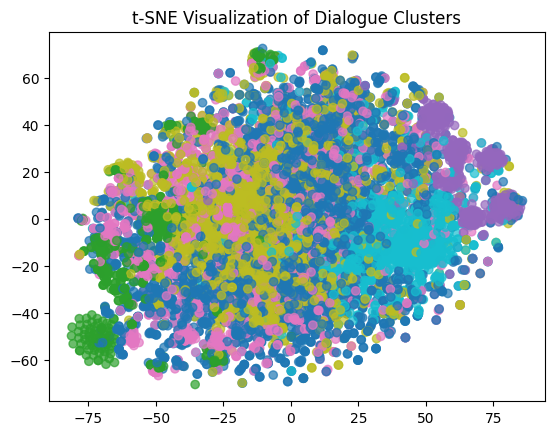

In [100]:
from sklearn.manifold import TSNE
reduced = TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(embeddings)
plt.scatter(reduced[:,0], reduced[:,1], c=data['Cluster'], cmap='tab10', alpha=0.7)
plt.title("t-SNE Visualization of Dialogue Clusters")
plt.show()

In [98]:
from sklearn.metrics import silhouette_score

score = silhouette_score(embeddings, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.018070998


In [99]:
data.to_csv('clustered_emtions.csv',index=False)
